In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
filename = 'ADNI_Tadpole_data_tutorial.xlsx'
data_df=pd.read_excel(filename)
data_df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'ADNI_Tadpole_data_tutorial.xlsx'

AUC: 0.705082
Accuracy: 0.601140


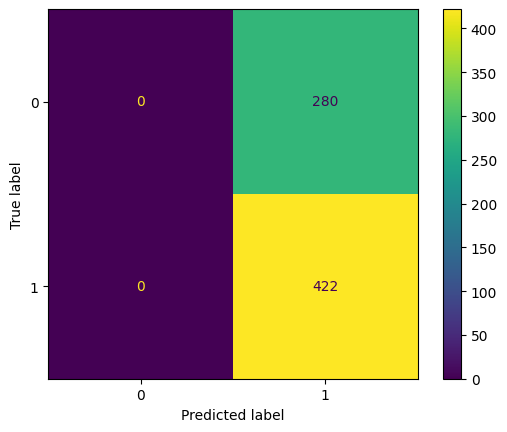

In [47]:
from sklearn.metrics import roc_auc_score , accuracy_score , roc_curve,confusion_matrix,ConfusionMatrixDisplay

age1 = data_df['AGE'].to_numpy()
gen1 = data_df['GENDER'].to_numpy()
edu1 = data_df['EDUCATION'].to_numpy()
apo1 = data_df['ApoE4'].to_numpy()


y = data_df['Amyloid status']


beta1 = np.array([1.551,-0.025,-0.549,0.141,2.622])

logit = beta1[0] + beta1[1]*age1 +beta1[2]*gen1 + beta1[3]*edu1  + beta1[4]*apo1

print('AUC: {:4f}'.format(roc_auc_score(y,logit)))
print('Accuracy: {:4f}'.format(accuracy_score(y,logit>0)))

cm= confusion_matrix(y, logit>0)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
##plt.plot(logit)
plt.show()
##weight1 = np.array([0.659,-0.027,-0.165,0.080,2.42])

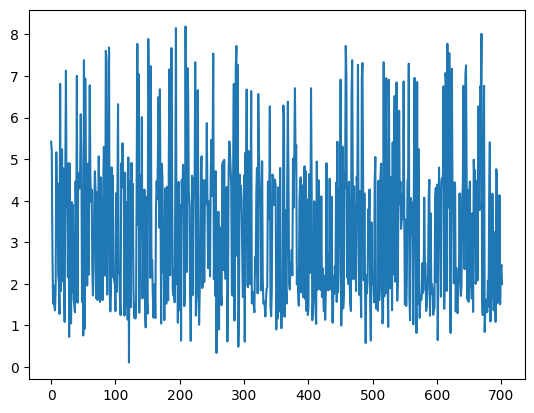

In [55]:
plt.plot(logit)
plt.show()

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import precision_score,accuracy_score

y_target = data_df['Amyloid status']
y_target = 2*(y_target -0.5)
x_data=data_df[['AGE','GENDER','EDUCATION','ApoE4']]

clf = LinearRegression()

clf.fit(x_data,y_target)

y_hat = clf.predict(x_data)

print('AUC: {:4f}'.format(roc_auc_score(y,logit)))
print('Accuracy: {:4f}'.format(accuracy_score(y,logit>0)))

cm= confusion_matrix(y, logit>0)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

fpr , tpr ,th = roc_curve(y_target , y_hat)

plt.plot(fpr, tpr)
plt.xlabel('false posative')
plt.ylabel('true posative')
plt.show()

NameError: name 'data_df' is not defined